<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%EB%B0%A9%ED%95%99%ED%94%8C%EC%A0%9D1_%EB%B3%80%EC%88%98%EA%B2%B0%ED%95%A9%EC%B7%A8%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **유전체 정보 품종 분류 AI 경진대회**

https://dacon.io/competitions/official/236035/overview/description

###**배경**
유전체 염기서열에서 획득한 유전체 변이 정보인 Single Nucleotide Polymorphism 정보는 특정 개체 및 특정 품종에 따라 다른 변이 양상을 나타낼 수 있기 때문에 동일개체를 확인하거나,동일 품종을 구분하는데 활용이 가능합니다. 따라서 이번 경진대회에서는 개체 정보와 SNP 정보를 이용하여 A, B, C 품종을 분류하는 최고의 품종구분 정확도를 획득하는 것이 목표입니다.
농축수산 현장에서는 유전체 변이정보를 이용해서 품종을 구분하는 연구를 통해 품종의 다양성 혹은 품종 부정유통을 방지하기 위해 많이 활용하게 됩니다.


###**주제**
개체와 SNP 정보를 이용하여 품종 분류 AI 모델 개발



###**설명**
시장에서 세 품종이 동시에 유통될 때, 각 품종의 고유한 생산품목(우유 및 식육)의 가치 및 가격 산정에 부정유통이 차단되기 위해 현장에서 사용 할 수 있는 AI 모델이 필요합니다.

즉, 많은 SNP 정보를 통해 분류하는 것보다, 보다 더 적은 SNP 정보로 높은 분류 성능을 내는 것이 중요합니다.

따라서 이번 경진대회에서는 개체 정보와 사전에 구성된 15개의 SNP 정보를 바탕으로 품종 분류 모델을 개발해야 합니다.



##**1. 데이터 불러오기**

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing

In [ ]:
class CFG:
    SEED = 42
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/train.csv")
#test = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/test.csv")
#snp_info = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/snp_info.csv")
#train = pd.read_csv("/content/drive/MyDrive/ESAA/방학/DATA/train.csv")
#test = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/test.csv')
# train=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/train.csv')
# test=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/test.csv')
# submit = pd.read_csv('/content/drive/MyDrive/readcsv/유전체/sample_submission.csv')
# info=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/snp_info.csv')
train=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_train.csv')
test=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_test.csv')
submit=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_sample_submission.csv')
info=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_info.csv')

In [ ]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터 세트 형상: (262, 21)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,object,0,262,TRAIN_000,TRAIN_001,TRAIN_002
1,father,int64,0,1,0,0,0
2,mother,int64,0,1,0,0,0
3,gender,int64,0,1,0,0,0
4,trait,int64,0,2,2,2,2
5,SNP_01,object,0,3,G G,A G,G G
6,SNP_02,object,0,3,A G,A G,G G
7,SNP_03,object,0,3,A A,C A,A A
8,SNP_04,object,0,3,G A,A A,G A
9,SNP_05,object,0,3,C A,A A,C C


In [ ]:
resumetable(test)

데이터 세트 형상: (175, 20)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,object,0,175,TEST_000,TEST_001,TEST_002
1,father,int64,0,1,0,0,0
2,mother,int64,0,1,0,0,0
3,gender,int64,0,1,0,0,0
4,trait,int64,0,2,1,2,2
5,SNP_01,object,0,3,A G,G G,G G
6,SNP_02,object,0,3,G G,A G,A G
7,SNP_03,object,0,3,A A,C C,A A
8,SNP_04,object,0,3,G A,G G,A A
9,SNP_05,object,0,3,A A,C C,C A


In [ ]:
train.head() #data에 null 없음 #father, mother, gender는 다 0

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [ ]:
test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

## **2. EDA**

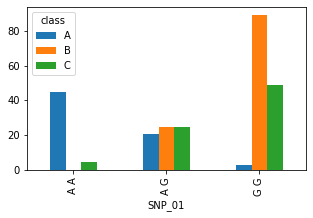

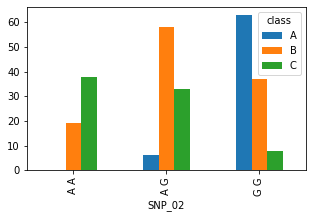

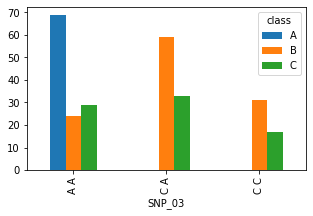

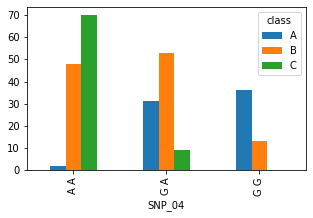

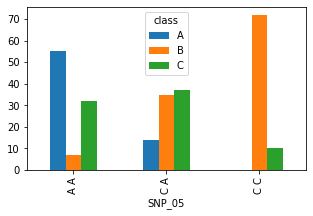

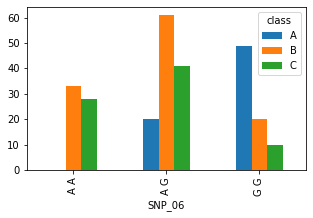

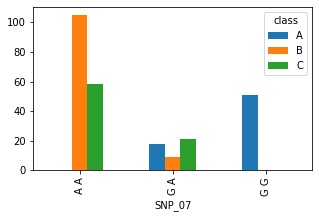

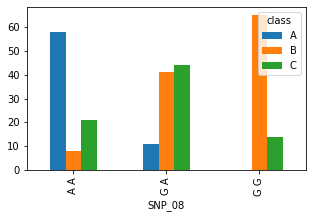

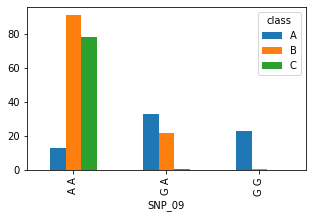

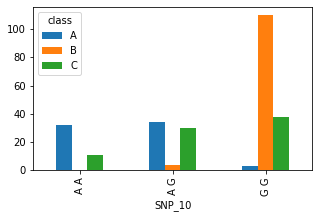

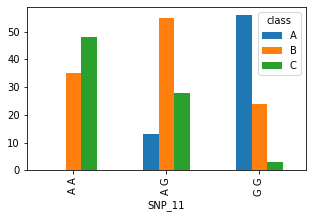

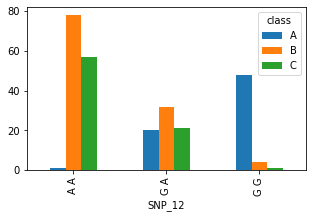

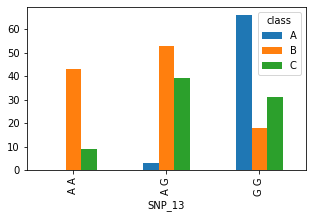

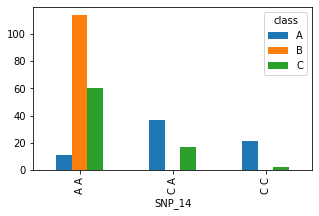

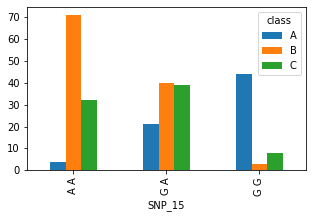

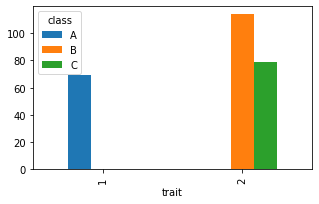

In [ ]:
for g in train.columns[train.columns.str.contains('SNP')].tolist()+['trait']:
    train.groupby(g)['class'].value_counts().unstack().plot.bar(figsize=(5,3));

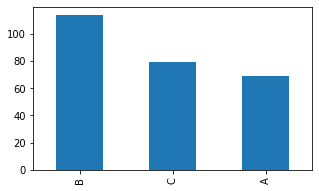

In [ ]:
train['class'].value_counts().plot.bar(figsize=(5,3))

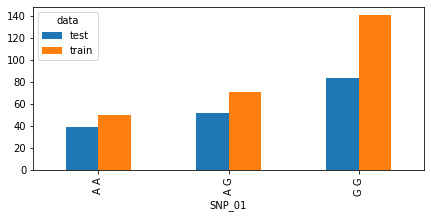

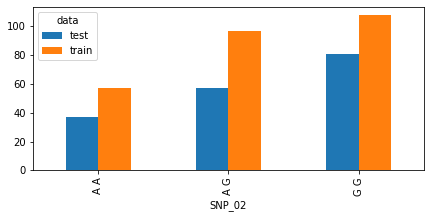

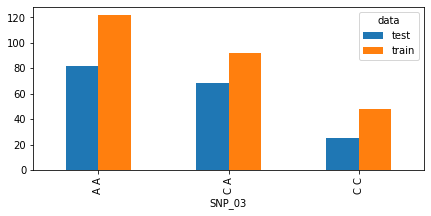

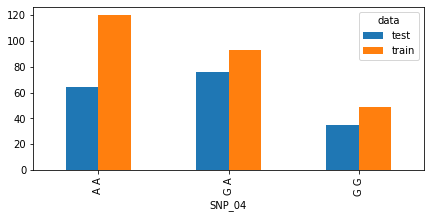

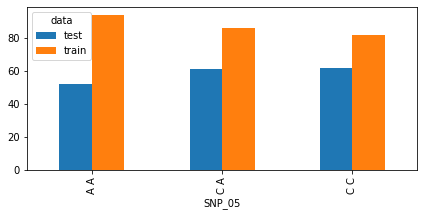

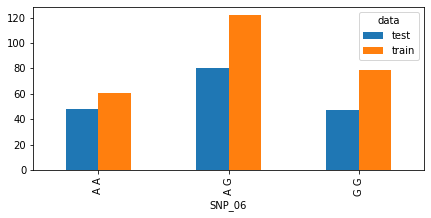

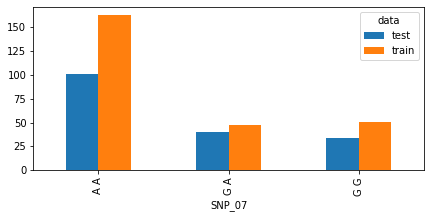

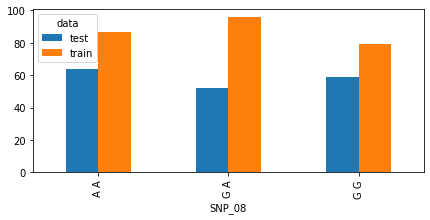

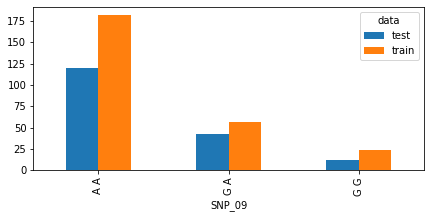

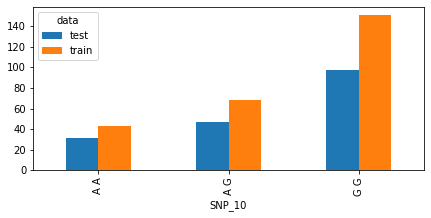

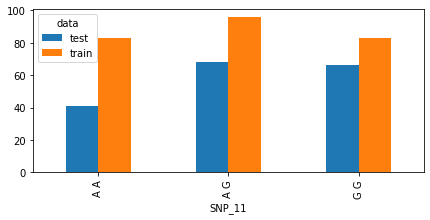

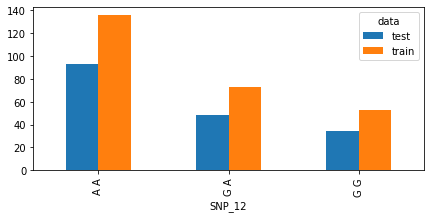

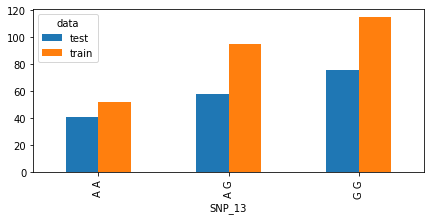

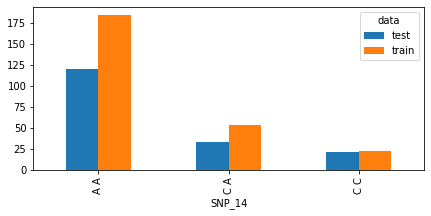

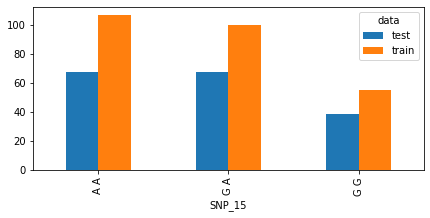

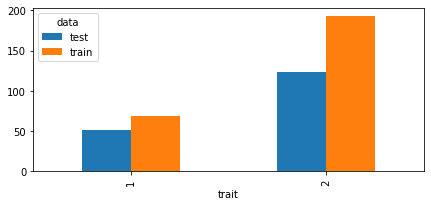

In [ ]:
#train test 비교
train['data'] = 'train'
test['data'] = 'test'
tmp = pd.concat([train,test]).reset_index(drop=True)
for g in tmp.columns[tmp.columns.str.contains('SNP')].tolist()+['trait']:   
    tmp.groupby([g])['data'].value_counts().unstack().plot.bar(figsize=(7,3));

## **3. 데이터 전처리**

### **Label-Encoding**

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)] #zfill(2): 길이가 2가 되도록 숫자 앞에 0을 붙임

In [ ]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

## **4. 모델 적합**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred, average='macro') #'micro', 'weighted'도 가능
    recall = recall_score(y_test , pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_tr_test, y_train, y_tr_test = train_test_split(train_x, train_y, test_size=0.2, random_state=156)

In [ ]:
from sklearn.model_selection import GridSearchCV 

### **4-1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
dt_clf=DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  2 15]]
정확도: 0.9057, 정밀도: 0.9167, 재현율: 0.9208, F1: 0.9184


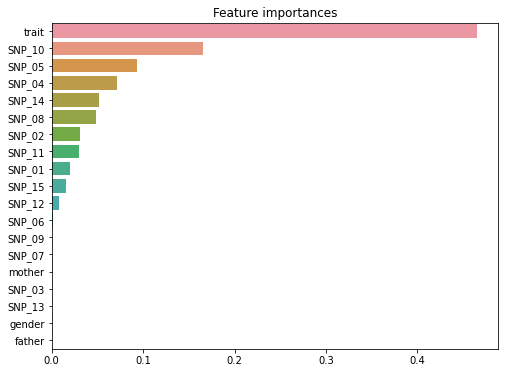

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
dt_preds=dt_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(dt_preds)
# submit.to_csv('/content/drive/MyDrive/readcsv/유전체/submit_dt.csv', index=False)

### **4-2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


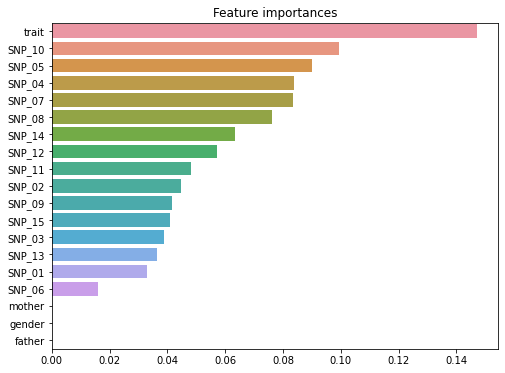

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
rf_preds=rf_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(rf_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_rf.csv', index=False)

In [ ]:
rf_clf1 = RandomForestClassifier()
parameters = {'max_depth': [4, 6, 8, 10, 12, None],
              'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20],
              'min_samples_leaf' : [8, 12, 15, 18],
              'n_estimators': [10, 30, 50, 80, 100, 120, 150, 200]
}


rf_grid = GridSearchCV(rf_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 2 folds for each of 1536 candidates, totalling 3072 fits
0.9330586080586081
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 80}


In [ ]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=80)
get_model_train_eval(rf_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663


In [ ]:
rf_preds=rf_model.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(rf_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_rf_model.csv', index=False)

### **4-3. XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
xgb_clf = XGBClassifier()
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


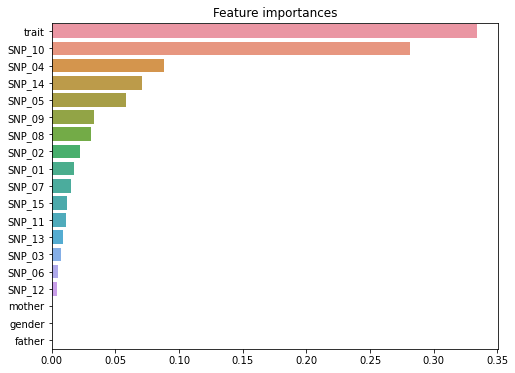

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
xgb_preds = xgb_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(xgb_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_xgb.csv', index=False)

### **4-4. GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier()
get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


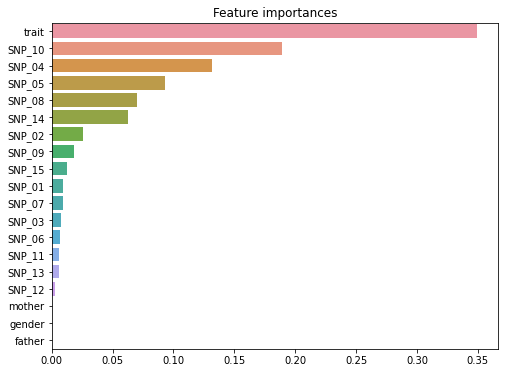

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = gbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
gbm_preds = gbm_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(gbm_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_gbm.csv', index=False)

### **4-5. Light GBM**

In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgbm
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


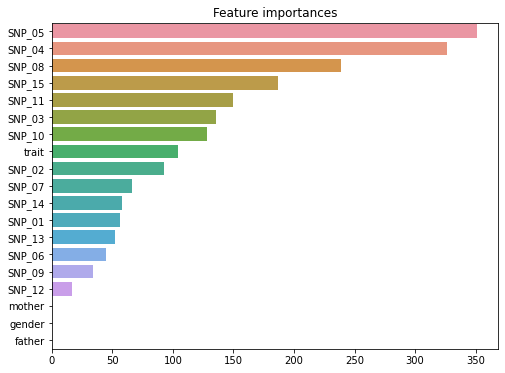

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
lgbm_preds = lgbm_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lgbm_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lgbm.csv', index=False)

In [ ]:
lgbm_clf1 = LGBMClassifier()
parameters = {'max_depth': [4,6,8,10],
              'learning_rate': [0.01,0.03,0.1,0.15],
              'n_estimators': [100,300,500]
}


lgbm_grid = GridSearchCV(lgbm_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
lgbm_grid.fit(X_train, y_train)

print(lgbm_grid.best_score_)
print(lgbm_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.9568681318681318
{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
lgbm_model = LGBMClassifier(learning_rate=0.03,max_depth=4,n_estimator=500)
get_model_train_eval(lgbm_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  3 14]]
정확도: 0.9434, 정밀도: 0.9643, 재현율: 0.9412, F1: 0.9489


In [ ]:
lgbm_preds1 = lgbm_model.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lgbm_preds1)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lgbm_model.csv', index=False)

### **4-6. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[10  0  1]
 [ 0 23  2]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9335, 재현율: 0.9234, F1: 0.9267


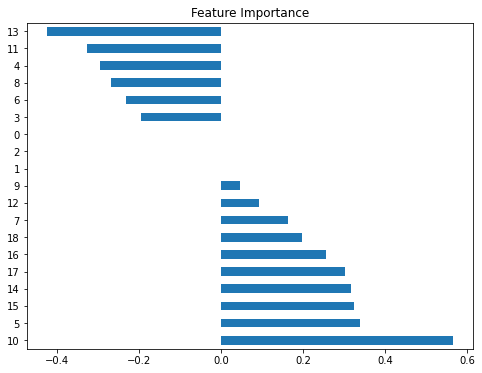

In [ ]:
# feature 중요도 # 'LogisticRegression' object has no attribute 'feature_importances_'
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importance = lr_clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.show()

In [ ]:
lr_preds = lr_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lr_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lr.csv', index=False)

### **4-7. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
get_model_train_eval(knn_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501


In [ ]:
# feature 중요도 # 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
knn_preds = knn_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(knn_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_knn.csv', index=False)

In [ ]:
parameters = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
knn_clf1 = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

Fitting 2 folds for each of 114 candidates, totalling 228 fits
0.8899267399267399
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
get_model_train_eval(knn_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663


In [ ]:
knn_preds1 = knn_model.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(knn_preds1)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_knn_model.csv', index=False)

### **4-8. Extra Trees Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf=ExtraTreesClassifier()
get_model_train_eval(extra_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


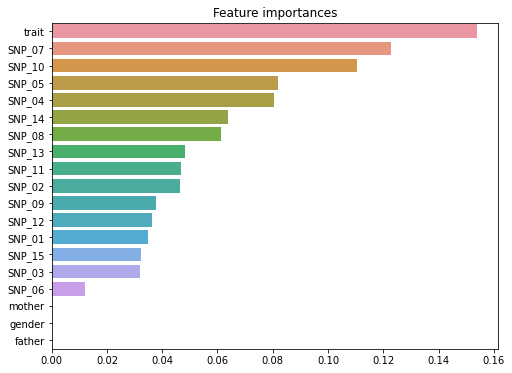

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = extra_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
extra_preds = extra_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(extra_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_extra.csv', index=False)

##**5. 변수결합**

###**5-1**
결합 기준 1: snp_info 상 name 비슷한 변수끼리 결합


In [ ]:
snp_info=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/snp_info.csv')
snp_info

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [ ]:
train_comb1 = train.copy()
test_comb1 = test.copy()

### BovineHD (5,6,8) 결합

In [ ]:
train_comb1["SNP_05_06_08"] = (train_comb1['SNP_05'].astype(str)+ "_"+ train_comb1['SNP_06'].astype(str)+ "_"+ train_comb1['SNP_08'].astype(str))
test_comb1["SNP_05_06_08"] = (test_comb1['SNP_05'].astype(str)+ "_"+ test_comb1['SNP_06'].astype(str)+ "_"+ test_comb1['SNP_08'].astype(str))
train_comb1.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class,SNP_05_06_08
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,G G,A A,G G,A G,A A,A A,A A,A A,B,C A_A A_G G
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G A,A A,A G,A A,G A,G G,A A,A A,C,A A_A G_G A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,G A,G A,A G,A A,A A,A A,A A,A A,B,C C_G G_G A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,A A,G G,A G,G G,G G,G G,A A,G G,A,A A_G G_A A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,G G,A A,A A,A G,A A,G A,C,C C_A A_A A


In [ ]:
train_comb1 = train_comb1.drop(['SNP_05','SNP_06','SNP_08'], axis=1)
train_comb1["SNP_05_06_08"].astype(object)
test_comb1= test_comb1.drop(['SNP_05','SNP_06','SNP_08'], axis=1)
test_comb1["SNP_05_06_08"].astype(object)
train_comb1.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_07,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class,SNP_05_06_08
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,A A,A A,G G,A G,A A,A A,A A,A A,B,C A_A A_G G
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,A A,A G,A A,G A,G G,A A,A A,C,A A_A G_G A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,A A,G A,A G,A A,A A,A A,A A,A A,B,C C_G G_G A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,G G,G G,A G,G G,G G,G G,A A,G G,A,A A_G G_A A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,A A,A A,G G,A A,A A,A G,A A,G A,C,C C_A A_A A


In [ ]:
train_x_comb1, train_y_comb1 = get_x_y(train_comb1)
test_x_comb1 = get_x_y(test_comb1)

### ARS-BFGL-NGS (3,4,9,11) 결합

In [ ]:
train_comb7 = train.copy()
test_comb7= test.copy()

train_comb7["SNP_03_04_09_11"] = (train_comb7['SNP_03'].astype(str)+ "_"+ train_comb7['SNP_04'].astype(str)+ "_"+ train_comb7['SNP_09'].astype(str)+ "_"+ train_comb7['SNP_11'].astype(str))
test_comb7["SNP_03_04_09_11"] = (test_comb7['SNP_03'].astype(str)+ "_"+ test_comb7['SNP_04'].astype(str)+ "_"+ test_comb7['SNP_09'].astype(str)+ "_"+ test_comb7['SNP_11'].astype(str))

train_comb7 = train_comb7.drop(['SNP_03','SNP_04','SNP_09','SNP_11'], axis=1)
train_comb7["SNP_03_04_09_11"].astype(object)
test_comb7= test_comb7.drop(['SNP_03','SNP_04','SNP_09','SNP_11'], axis=1)
test_comb7["SNP_03_04_09_11"].astype(object)

train_x_comb7, train_y_comb7= get_x_y(train_comb7)
test_x_comb7 = get_x_y(test_comb7)

Hapmap (7,12,14) 결합

In [ ]:
train_comb8 = train.copy()
test_comb8 = test.copy()

train_comb8["SNP_07_12_14"] = (train_comb8['SNP_07'].astype(str)+ "_"+ train_comb8['SNP_12'].astype(str)+ "_"+ train_comb8['SNP_14'].astype(str))
test_comb8["SNP_07_12_14"] = (test_comb8['SNP_07'].astype(str)+ "_"+ test_comb8['SNP_12'].astype(str)+ "_"+ test_comb8['SNP_14'].astype(str))

train_comb8 = train_comb8.drop(['SNP_07','SNP_12','SNP_14'], axis=1)
train_comb8["SNP_07_12_14"].astype(object)
test_comb8= test_comb8.drop(['SNP_07','SNP_12','SNP_14'], axis=1)
test_comb8["SNP_07_12_14"].astype(object)

train_x_comb8, train_y_comb8 = get_x_y(train_comb8)
test_x_comb8 = get_x_y(test_comb8)

(비슷한 변수들 한번에 결합)
* BovineHD (5,6,8)
* ARS-BFGL-NGS (3,4,9,11)
* Hapmap (7,12,14)

In [ ]:
train_comb5 = train.copy()
test_comb5 = test.copy()
train_comb5.drop(['father', 'mother', 'gender'], axis=1, inplace=True) #의미없는 변수 드롭
test_comb5.drop(['father', 'mother', 'gender'], axis=1, inplace=True)

In [ ]:
train_comb5["SNP_5_6_8"] = (train['SNP_05'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_08'].astype(str))
train_comb5.drop(['SNP_05', 'SNP_06', 'SNP_08'], axis=1, inplace=True)
train_comb5["SNP_5_6_8"].astype(object) #문자열을 범주형변수로 변환

train_comb5["SNP_3_4_9_11"] = (train['SNP_03'].astype(str)+ "_"+ train['SNP_04'].astype(str)+ "_"+ train['SNP_09'].astype(str)+ "_"+ train['SNP_11'].astype(str))
train_comb5.drop(['SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'], axis=1, inplace=True)
train_comb5["SNP_3_4_9_11"].astype(object)

train_comb5["SNP_7_12_14"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_14'].astype(str))
train_comb5.drop(['SNP_07', 'SNP_12', 'SNP_14'], axis=1, inplace=True)
train_comb5["SNP_7_12_14"].astype(object)

test_comb5["SNP_5_6_8"] = (train['SNP_05'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_08'].astype(str))
test_comb5.drop(['SNP_05', 'SNP_06', 'SNP_08'], axis=1, inplace=True)
test_comb5["SNP_5_6_8"].astype(object) #문자열을 범주형변수로 변환

test_comb5["SNP_3_4_9_11"] = (train['SNP_03'].astype(str)+ "_"+ train['SNP_04'].astype(str)+ "_"+ train['SNP_09'].astype(str)+ "_"+ train['SNP_11'].astype(str))
test_comb5.drop(['SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'], axis=1, inplace=True)
test_comb5["SNP_3_4_9_11"].astype(object)

test_comb5["SNP_7_12_14"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_14'].astype(str))
test_comb5.drop(['SNP_07', 'SNP_12', 'SNP_14'], axis=1, inplace=True)
test_comb5["SNP_7_12_14"].astype(object)

train_comb5.head()

,id,trait,SNP_01,SNP_02,SNP_10,SNP_13,SNP_15,class,SNP_5_6_8,SNP_3_4_9_11,SNP_7_12_14
0,TRAIN_000,2,G G,A G,G G,A A,A A,B,C A_A A_G G,A A_G A_A A_A G,A A_A A_A A
1,TRAIN_001,2,A G,A G,A G,G G,A A,C,A A_A G_G A,C A_A A_A A_A A,A A_G A_A A
2,TRAIN_002,2,G G,G G,A G,A A,A A,B,C C_G G_G A,A A_G A_G A_A A,A A_A A_A A
3,TRAIN_003,1,A A,G G,A G,G G,G G,A,A A_G G_A A,A A_G A_G G_G G,G G_G G_A A
4,TRAIN_004,2,G G,G G,G G,A G,G A,C,C C_A A_A A,C C_A A_A A_A A,A A_A A_A A


In [ ]:
train_x_comb5, train_y_comb5 = get_x_y(train_comb5)
test_x_comb5 = get_x_y(test_comb5)

결합 기준 2: EDA 분포 비슷

(비슷한 변수들 하나씩 결합)


7, 12, 15 결합

In [ ]:
train_comb2 = train.copy()
test_comb2 = test.copy()

train_comb2["SNP_07_12_15"] = (train_comb2['SNP_07'].astype(str)+ "_"+ train_comb2['SNP_12'].astype(str)+ "_"+ train_comb2['SNP_15'].astype(str))
test_comb2["SNP_07_12_15"] = (test_comb2['SNP_07'].astype(str)+ "_"+ test_comb2['SNP_12'].astype(str)+ "_"+ test_comb2['SNP_15'].astype(str))

train_comb2 = train_comb2.drop(['SNP_07','SNP_12','SNP_15'], axis=1)
train_comb2["SNP_07_12_15"].astype(object)
test_comb2= test_comb2.drop(['SNP_07','SNP_12','SNP_15'], axis=1)
test_comb2["SNP_07_12_15"].astype(object)

train_x_comb2, train_y_comb2 = get_x_y(train_comb2)
test_x_comb2 = get_x_y(test_comb2)

4, 6, 11 결합

In [ ]:
train_comb3 = train.copy()
test_comb3 = test.copy()

train_comb3["SNP_04_06_11"] = (train_comb3['SNP_04'].astype(str)+ "_"+ train_comb3['SNP_06'].astype(str)+ "_"+ train_comb3['SNP_11'].astype(str))
test_comb3["SNP_04_06_11"] = (test_comb3['SNP_04'].astype(str)+ "_"+ test_comb3['SNP_06'].astype(str)+ "_"+ test_comb3['SNP_11'].astype(str))

train_comb3 = train_comb3.drop(['SNP_04','SNP_06','SNP_11'], axis=1)
train_comb3["SNP_04_06_11"].astype(object)
test_comb3= test_comb3.drop(['SNP_04','SNP_06','SNP_11'], axis=1)
test_comb3["SNP_04_06_11"].astype(object)

train_x_comb3, train_y_comb3 = get_x_y(train_comb3)
test_x_comb3 = get_x_y(test_comb3)

1, 5 결합

In [ ]:
train_comb4 = train.copy()
test_comb4 = test.copy()

train_comb4["SNP_01_05"] = (train_comb4['SNP_01'].astype(str)+ "_"+ train_comb4['SNP_05'].astype(str))
test_comb4["SNP_01_05"] = (test_comb4['SNP_01'].astype(str)+ "_"+ test_comb4['SNP_05'].astype(str))
train_comb4["SNP_01_05"].astype(object)
test_comb4["SNP_01_05"].astype(object)

0      A G_A A
1      G G_C C
2      G G_C A
3      G G_C C
4      A A_A A
        ...   
170    A G_C A
171    G G_C A
172    G G_C A
173    A G_C C
174    G G_C A
Name: SNP_01_05, Length: 175, dtype: object

In [ ]:
train_comb4 = train_comb4.drop(['SNP_01','SNP_05'], axis=1)
test_comb4 = test_comb4.drop(['SNP_01','SNP_05'], axis=1)
     

train_x_comb4, train_y_comb4 = get_x_y(train_comb4)
test_x_comb4 = get_x_y(test_comb4)

(비슷한 변수들 한번에 결합)
* (7,12,15)
* (4,6,11)
* (1,5)

In [ ]:
train_comb6 = train.copy()
test_comb6 = test.copy()
train_comb6.drop(['father', 'mother', 'gender'], axis=1, inplace=True) #의미없는 변수 드롭
test_comb6.drop(['father', 'mother', 'gender'], axis=1, inplace=True)

In [ ]:
train_comb6["SNP_7_12_15"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_15'].astype(str))
train_comb6.drop(['SNP_07', 'SNP_12', 'SNP_15'], axis=1, inplace=True)
train_comb6["SNP_7_12_15"].astype(object) #문자열을 범주형으로 형변환

train_comb6["SNP_4_6_11"] = (train['SNP_04'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_11'].astype(str))
train_comb6.drop(['SNP_04', 'SNP_06', 'SNP_11'], axis=1, inplace=True)
train_comb6["SNP_4_6_11"].astype(object)

train_comb6["SNP_1_5"] = (train['SNP_01'].astype(str)+ "_"+ train['SNP_05'].astype(str))
train_comb6.drop(['SNP_01', 'SNP_05'], axis=1, inplace=True)
train_comb6["SNP_1_5"].astype(object)

test_comb6["SNP_7_12_15"] = (test['SNP_07'].astype(str)+ "_"+ test['SNP_12'].astype(str)+ "_"+ test['SNP_15'].astype(str))
test_comb6.drop(['SNP_07', 'SNP_12', 'SNP_15'], axis=1, inplace=True)
test_comb6["SNP_7_12_15"].astype(object)

test_comb6["SNP_4_6_11"] = (test['SNP_04'].astype(str)+ "_"+ test['SNP_06'].astype(str)+ "_"+ test['SNP_11'].astype(str))
test_comb6.drop(['SNP_04', 'SNP_06', 'SNP_11'], axis=1, inplace=True)
test_comb6["SNP_4_6_11"].astype(object)

test_comb6["SNP_1_5"] = (test['SNP_01'].astype(str)+ "_"+ test['SNP_05'].astype(str))
test_comb6.drop(['SNP_01', 'SNP_05'], axis=1, inplace=True)
test_comb6["SNP_1_5"].astype(object)

train_comb6.head()

,id,trait,SNP_02,SNP_03,SNP_08,SNP_09,SNP_10,SNP_13,SNP_14,class,SNP_7_12_15,SNP_4_6_11,SNP_1_5
0,TRAIN_000,2,A G,A A,G G,A A,G G,A A,A A,B,A A_A A_A A,G A_A A_A G,G G_C A
1,TRAIN_001,2,A G,C A,G A,A A,A G,G G,A A,C,A A_G A_A A,A A_A G_A A,A G_A A
2,TRAIN_002,2,G G,A A,G A,G A,A G,A A,A A,B,A A_A A_A A,G A_G G_A A,G G_C C
3,TRAIN_003,1,G G,A A,A A,G G,A G,G G,A A,A,G G_G G_G G,G A_G G_G G,A A_A A
4,TRAIN_004,2,G G,C C,A A,A A,G G,A G,A A,C,A A_A A_G A,A A_A A_A A,G G_C C


In [ ]:
train_x_comb6, train_y_comb6 = get_x_y(train_comb6)
test_x_comb6 = get_x_y(test_comb6)

###**5-2 Label-Encoding**
(이름 비슷, 하나씩) 5, 6, 8 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col_comb1 = ['SNP_01','SNP_02','SNP_03','SNP_04','SNP_07','SNP_09','SNP_10','SNP_11','SNP_12','SNP_13','SNP_14','SNP_15','SNP_05_06_08']

In [ ]:
snp_data_train1 = []
for col in snp_col_comb1:
    snp_data_train1 += list(train_x_comb1[col].values)
snp_data_test1 = []
for col in snp_col_comb1:
    snp_data_test1 += list(test_x_comb1[col].values)

train_y_comb1 = class_le.fit_transform(train_y_comb1)
snp_le_train.fit(snp_data_train1)
snp_le_test.fit(snp_data_test1)

for col in train_x_comb1.columns:
    if col in snp_col_comb1:
        train_x_comb1[col] = snp_le_train.transform(train_x_comb1[col])
for col in test_x_comb1.columns:
    if col in snp_col_comb1:
        test_x_comb1[col] = snp_le_test.transform(test_x_comb1[col])

In [ ]:
#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb1, X_tr_test_comb1, y_train_comb1, y_tr_test_comb1 = train_test_split(train_x_comb1, train_y_comb1, test_size=0.2, random_state=156)

3, 4, 9, 11 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col7 = ['SNP_01','SNP_02','SNP_05','SNP_06','SNP_07','SNP_08','SNP_10','SNP_12','SNP_13','SNP_14','SNP_15','SNP_03_04_09_11']
     
snp_data_train7 = []
for col in snp_col7:
    snp_data_train7 += list(train_x_comb7[col].values)
snp_data_test7 = []
for col in snp_col7:
    snp_data_test7 += list(test_x_comb7[col].values)

train_y_comb7 = class_le.fit_transform(train_y_comb7)
snp_le_train.fit(snp_data_train7)
snp_le_test.fit(snp_data_test7)

for col in train_x_comb7.columns:
    if col in snp_col7:
        train_x_comb7[col] = snp_le_train.transform(train_x_comb7[col])
for col in test_x_comb7.columns:
    if col in snp_col7:
        test_x_comb7[col] = snp_le_test.transform(test_x_comb7[col])

X_train_comb7, X_tr_test_comb7, y_train_comb7, y_tr_test_comb7 = train_test_split(train_x_comb7, train_y_comb7, test_size=0.2, random_state=156)

7, 12, 14 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col8 = ['SNP_01','SNP_02','SNP_03','SNP_04','SNP_05','SNP_06','SNP_08','SNP_09','SNP_10','SNP_11','SNP_13','SNP_15','SNP_07_12_14']

snp_data_train8 = []
for col in snp_col8:
    snp_data_train8 += list(train_x_comb8[col].values)
snp_data_test8 = []
for col in snp_col8:
    snp_data_test8 += list(test_x_comb8[col].values)

train_y_comb8 = class_le.fit_transform(train_y_comb8)
snp_le_train.fit(snp_data_train8)
snp_le_test.fit(snp_data_test8)

for col in train_x_comb8.columns:
    if col in snp_col8:
        train_x_comb8[col] = snp_le_train.transform(train_x_comb8[col])
for col in test_x_comb8.columns:
    if col in snp_col8:
        test_x_comb8[col] = snp_le_test.transform(test_x_comb8[col])

#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb8, X_tr_test_comb8, y_train_comb8, y_tr_test_comb8 = train_test_split(train_x_comb8, train_y_comb8, test_size=0.2, random_state=156)

(이름 비슷, 한번에) 5,6,8 / 3,4,9,11 / 7,12,14 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col5 = ['SNP_01',	'SNP_02',	'SNP_10',	'SNP_13',	'SNP_15',	
           'SNP_5_6_8',	'SNP_3_4_9_11',	'SNP_7_12_14']
     
snp_data_train5 = []
for col in snp_col5:
    snp_data_train5 += list(train_x_comb5[col].values)
snp_data_test5 = []
for col in snp_col5:
    snp_data_test5 += list(test_x_comb5[col].values)

train_y_comb5 = class_le.fit_transform(train_y_comb5)
snp_le_train.fit(snp_data_train5)
snp_le_test.fit(snp_data_test5)

for col in train_x_comb5.columns:
    if col in snp_col5:
        train_x_comb5[col] = snp_le_train.transform(train_x_comb5[col])
for col in test_x_comb5.columns:
    if col in snp_col5:
        test_x_comb5[col] = snp_le_test.transform(test_x_comb5[col])

X_train_comb5, X_tr_test_comb5, y_train_comb5, y_tr_test_comb5 = train_test_split(train_x_comb5, train_y_comb5, test_size=0.2, random_state=156)

(분포 비슷, 하나씩) 7, 12, 15 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col_comb2 = ['SNP_01','SNP_02','SNP_03','SNP_04','SNP_05','SNP_06','SNP_08','SNP_09','SNP_10','SNP_11','SNP_13','SNP_14','SNP_07_12_15']

snp_data_comb2 = []
for col in snp_col_comb2:
    snp_data_comb2 += list(train_x_comb2[col].values)

train_y_comb2 = class_le.fit_transform(train_y_comb2)
snp_le.fit(snp_data_comb2)

for col in train_x_comb2.columns:
    if col in snp_col_comb2:
        train_x_comb2[col] = snp_le.transform(train_x_comb2[col])
        test_x_comb2[col] = snp_le.transform(test_x_comb2[col])

#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb2, X_tr_test_comb2, y_train_comb2, y_tr_test_comb2 = train_test_split(train_x_comb2, train_y_comb2, test_size=0.2, random_state=156)

4, 6, 11 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col_comb3 = ['SNP_01','SNP_02','SNP_03','SNP_05','SNP_07','SNP_08','SNP_09','SNP_10','SNP_12','SNP_13','SNP_14','SNP_15','SNP_04_06_11']

snp_data_comb3 = []
for col in snp_col_comb3:
    snp_data_comb3 += list(train_x_comb3[col].values)

train_y_comb3 = class_le.fit_transform(train_y_comb3)
snp_le.fit(snp_data_comb3)

for col in train_x_comb3.columns:
    if col in snp_col_comb3:
        train_x_comb3[col] = snp_le.transform(train_x_comb3[col])
        test_x_comb3[col] = snp_le.transform(test_x_comb3[col])

#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb3, X_tr_test_comb3, y_train_comb3, y_tr_test_comb3 = train_test_split(train_x_comb3, train_y_comb3, test_size=0.2, random_state=156)

1, 5 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col4 = ['SNP_02','SNP_03','SNP_04','SNP_06','SNP_07','SNP_08','SNP_09','SNP_10','SNP_11','SNP_12','SNP_13','SNP_14','SNP_15','SNP_01_05']

snp_data_train4 = []
for col in snp_col4:
    snp_data_train4 += list(train_x_comb4[col].values)
     

snp_data_test4 = []
for col in snp_col4:
    snp_data_test4 += list(test_x_comb4[col].values)
     

train_y_comb4 = class_le.fit_transform(train_y_comb4)
snp_le_train.fit(snp_data_train4)
snp_le_test.fit(snp_data_test4)
     

LabelEncoder()

In [ ]:
for col in train_x_comb4.columns:
    if col in snp_col4:
        train_x_comb4[col] = snp_le_train.transform(train_x_comb4[col])
     
for col in test_x_comb4.columns:
    if col in snp_col4:
        test_x_comb4[col] = snp_le_test.transform(test_x_comb4[col])

In [ ]:
#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb4, X_tr_test_comb4, y_train_comb4, y_tr_test_comb4 = train_test_split(train_x_comb4, train_y_comb4, test_size=0.2, random_state=156)

(분포 비슷, 한번에) 7,12,15 / 4,6,11 / 1,5 결합

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col6 = ['SNP_02','SNP_03','SNP_08',
           'SNP_09','SNP_10','SNP_13','SNP_14',
           'SNP_7_12_15', 'SNP_4_6_11', 'SNP_1_5']
     
snp_data_train6 = []
for col in snp_col6:
    snp_data_train6 += list(train_x_comb6[col].values)
snp_data_test6 = []
for col in snp_col6:
    snp_data_test6 += list(test_x_comb6[col].values)

train_y_comb6 = class_le.fit_transform(train_y_comb6)
snp_le_train.fit(snp_data_train6)
snp_le_test.fit(snp_data_test6)

for col in train_x_comb6.columns:
    if col in snp_col6:
        train_x_comb6[col] = snp_le_train.transform(train_x_comb6[col])
for col in test_x_comb6.columns:
    if col in snp_col6:
        test_x_comb6[col] = snp_le_test.transform(test_x_comb6[col])

X_train_comb6, X_tr_test_comb6, y_train_comb6, y_tr_test_comb6 = train_test_split(train_x_comb6, train_y_comb6, test_size=0.2, random_state=156)

##**6. SMOTE**

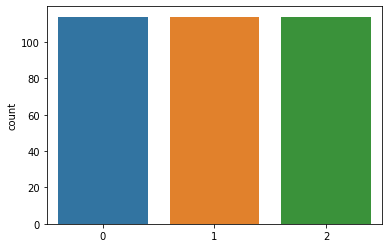

In [ ]:
# 변수결합x
from imblearn.over_sampling import SMOTE
train_x_s, train_y_s = SMOTE().fit_resample(train_x, train_y)

import seaborn as sns
sns.countplot(train_y_s)

X_train_s, X_tr_test_s, y_train_s, y_tr_test_s = train_test_split(train_x_s, train_y_s, test_size=0.2, random_state=156)

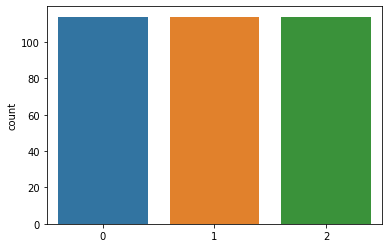

In [ ]:
# 변수결합1 -이름기준
train_x_comb5_s, train_y_comb5_s = SMOTE().fit_resample(train_x_comb5, train_y_comb5)
sns.countplot(train_y_comb5_s)

X_train_comb5_s, X_tr_test_comb5_s, y_train_comb5_s, y_tr_test_comb5_s = train_test_split(train_x_comb5_s, train_y_comb5_s, test_size=0.2, random_state=156)

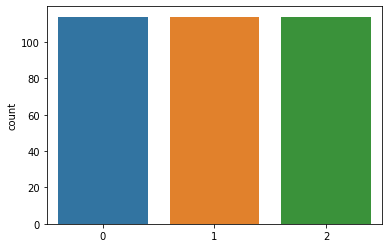

In [ ]:
# 변수결합2 -분포기준
train_x_comb6_s, train_y_comb6_s = SMOTE().fit_resample(train_x_comb6, train_y_comb6)
sns.countplot(train_y_comb6_s)

X_train_comb6_s, X_tr_test_comb6_s, y_train_comb6_s, y_tr_test_comb6_s = train_test_split(train_x_comb6_s, train_y_comb6_s, test_size=0.2, random_state=156)

##**7. 모델 적합 2**

###**7-1 Decision Tree**

In [ ]:
dt_clf=DecisionTreeClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(dt_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(dt_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(dt_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(dt_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(dt_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(dt_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 21  4]
 [ 0  1 16]]
정확도: 0.9057, 정밀도: 0.9182, 재현율: 0.9271, F1: 0.9195
오차 행렬
[[11  0  0]
 [ 0 20  5]
 [ 0  4 13]]
정확도: 0.8302, 정밀도: 0.8519, 재현율: 0.8549, F1: 0.8531
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  3 14]]
정확도: 0.8868, 정밀도: 0.9012, 재현율: 0.9012, F1: 0.9012
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 21  4]
 [ 0  1 16]]
정확도: 0.9057, 정밀도: 0.9182, 재현율: 0.9271, F1: 0.9195
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  2 15]]
정확도: 0.9057, 정밀도: 0.9167, 재현율: 0.9208, F1: 0.9184
오차 행렬
[[11  0  0]
 [ 0 21  4]
 [ 0  1 16]]
정확도: 0.9057, 정밀도: 0.9182, 재현율: 0.9271, F1: 0.9195
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  2 15]]
정확도: 0.9057, 정밀도: 0.9167, 재현율: 0.9208, F1: 0.9184
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9329, 재현율: 0.9404, F1: 0.9352
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 22  2]
 [ 0  4 15]]
정확도: 0.9130, 정밀도: 0.9095, 재현율: 0.9020, F1: 0.9044
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 22  2

###**7-2 Random Forest**

In [ ]:
rf_clf = RandomForestClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(rf_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(rf_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(rf_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(rf_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  0 17]]
정확도: 0.9434, 정밀도: 0.9500, 재현율: 0.9600, F1: 0.9517
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  1 18]]
정확도: 0.9710, 정밀도: 0.9686, 재현율: 0.9686, F1: 0.9686
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1

In [ ]:
rf_clf1 = RandomForestClassifier()
parameters = {'max_depth': [4, 6, 8, 10, 12, None],
              'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20],
              'min_samples_leaf' : [8, 12, 15, 18],
              'n_estimators': [10, 30, 50, 80, 100, 120, 150, 200]
}


rf_grid = GridSearchCV(rf_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 2 folds for each of 1536 candidates, totalling 3072 fits
0.9425824175824176
{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}


In [ ]:
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=16, n_estimators=50)
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(rf_model, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(rf_model, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(rf_model, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(rf_model, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(rf_model, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(rf_model, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(rf_model, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(rf_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  3 14]]
정확도: 0.9057, 정밀도: 0.9199, 재현율: 0.9145, F1: 0.9168
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  0 17]]
정확도: 0.9623, 정밀도: 0.9649, 재현율: 0.9733, F1: 0.9676
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  3 14]]
정확도: 0.9434, 정밀도: 0.9643, 재현율: 0.9412, F1: 0.9489
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  3 14]]
정확도: 0.9245, 정밀도: 0.9407, 재현율: 0.9278, F1: 0.9327
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  1 18]]
정확도: 0.9710, 정밀도: 0.9686, 재현율: 0.9686, F1: 0.9686
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1

###**7-3 XGBoost**

In [ ]:
xgb_clf = XGBClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(xgb_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(xgb_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(xgb_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(xgb_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(xgb_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  1 16]]
정확도: 0.9434, 정밀도: 0.9491, 재현율: 0.9537, F1: 0.9510
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  3 16]]
정확도: 0.9420, 정밀도: 0.9419, 재현율: 0.9335, F1: 0.9363
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 21  3

###**7-4 GBM**

In [ ]:
gbm_clf = GradientBoostingClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(gbm_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(gbm_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(gbm_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(gbm_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(gbm_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  2 15]]
정확도: 0.9057, 정밀도: 0.9167, 재현율: 0.9208, F1: 0.9184
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  0 17]]
정확도: 0.9811, 정밀도: 0.9815, 재현율: 0.9867, F1: 0.9837
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 21  4]
 [ 0  2 15]]
정확도: 0.8868, 정밀도: 0.9008, 재현율: 0.9075, F1: 0.9028
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  4 15]]
정확도: 0.9275, 정밀도: 0.9298, 재현율: 0.9159, F1: 0.9197
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 21  3

###**7-5 Light GBM**

In [ ]:
lgbm_clf = LGBMClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(lgbm_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9329, 재현율: 0.9404, F1: 0.9352
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  3 16]]
정확도: 0.9420, 정밀도: 0.9419, 재현율: 0.9335, F1: 0.9363
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 22  2

In [ ]:
lgbm_clf1 = LGBMClassifier()
parameters = {'max_depth': [4,6,8,10],
              'learning_rate': [0.01,0.03,0.1,0.15],
              'n_estimators': [100,300,500]
}


lgbm_grid = GridSearchCV(lgbm_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
lgbm_grid.fit(X_train, y_train)

print(lgbm_grid.best_score_)
print(lgbm_grid.best_params_)

In [ ]:
lgbm_model = LGBMClassifier(learning_rate=0.03,max_depth=4,n_estimator=500)
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(lgbm_clf1, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9329, 재현율: 0.9404, F1: 0.9352
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  3 16]]
정확도: 0.9420, 정밀도: 0.9419, 재현율: 0.9335, F1: 0.9363
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 22  2

### **7-6 Logistic Regression**

In [ ]:
lr_clf = LogisticRegression()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(lr_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(lr_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(lr_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(lr_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(lr_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(lr_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 1  0 16]]
정확도: 0.9434, 정밀도: 0.9352, 재현율: 0.9537, F1: 0.9430
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 21  4]
 [ 0  1 16]]
정확도: 0.9057, 정밀도: 0.9182, 재현율: 0.9271, F1: 0.9195
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 1 23  1]
 [ 1  0 16]]
정확도: 0.9434, 정밀도: 0.9291, 재현율: 0.9537, F1: 0.9387
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 1  2 14]]
정확도: 0.8868, 정밀도: 0.8856, 재현율: 0.9012, F1: 0.8927
오차 행렬
[[10  0  1]
 [ 0 22  3]
 [ 0  1 16]]
정확도: 0.9057, 정밀도: 0.9188, 재현율: 0.9101, F1: 0.9113
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  2 15]]
정확도: 0.9245, 정밀도: 0.9341, 재현율: 0.9341, F1: 0.9341
*****스모트*****
오차 행렬
[[25  0  1]
 [ 0 24  0]
 [ 0  1 18]]
정확도: 0.9710, 정밀도: 0.9691, 재현율: 0.9696, F1: 0.9691
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[25  0  1]
 [ 0 23  1

### **7-7 KNN**

In [ ]:
knn_clf = KNeighborsClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(knn_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(knn_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(knn_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(knn_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(knn_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(knn_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  1 16]]
정확도: 0.9434, 정밀도: 0.9491, 재현율: 0.9537, F1: 0.9510
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 2  1 14]]
정확도: 0.8868, 정밀도: 0.8754, 재현율: 0.9012, F1: 0.8856
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  3 14]]
정확도: 0.9245, 정밀도: 0.9407, 재현율: 0.9278, F1: 0.9327
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  3 14]]
정확도: 0.9434, 정밀도: 0.9643, 재현율: 0.9412, F1: 0.9489
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9329, 재현율: 0.9404, F1: 0.9352
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 24  0]
 [ 0  2 17]]
정확도: 0.9710, 정밀도: 0.9744, 재현율: 0.9649, F1: 0.9681
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 21  3

In [ ]:
parameters = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
knn_clf1 = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

Fitting 2 folds for each of 114 candidates, totalling 228 fits
0.8899267399267399
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(knn_model, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(knn_model, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(knn_model, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(knn_model, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(knn_model, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(knn_model, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 1  2 14]]
정확도: 0.9245, 정밀도: 0.9244, 재현율: 0.9278, F1: 0.9242
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 1  3 13]]
정확도: 0.8679, 정밀도: 0.8697, 재현율: 0.8816, F1: 0.8748
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  3 14]]
정확도: 0.9434, 정밀도: 0.9643, 재현율: 0.9412, F1: 0.9489
오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  2 15]]
정확도: 0.9245, 정밀도: 0.9341, 재현율: 0.9341, F1: 0.9341
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  2 17]]
정확도: 0.9565, 정밀도: 0.9548, 재현율: 0.9510, F1: 0.9526
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 22  2

### **7-8 Extra Trees Classifier**

In [ ]:
extra_clf=ExtraTreesClassifier()
print('*****변수결합(이름) 하나씩*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb1, ftr_test=X_tr_test_comb1, tgt_train=y_train_comb1, tgt_test=y_tr_test_comb1)
get_model_train_eval(extra_clf, ftr_train=X_train_comb7, ftr_test=X_tr_test_comb7, tgt_train=y_train_comb7, tgt_test=y_tr_test_comb7)
get_model_train_eval(extra_clf, ftr_train=X_train_comb8, ftr_test=X_tr_test_comb8, tgt_train=y_train_comb8, tgt_test=y_tr_test_comb8)
print('*****변수결합(이름) 한번에*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb5, ftr_test=X_tr_test_comb5, tgt_train=y_train_comb5, tgt_test=y_tr_test_comb5)
print('*****변수결합(분포) 하나씩*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb2, ftr_test=X_tr_test_comb2, tgt_train=y_train_comb2, tgt_test=y_tr_test_comb2)
get_model_train_eval(extra_clf, ftr_train=X_train_comb3, ftr_test=X_tr_test_comb3, tgt_train=y_train_comb3, tgt_test=y_tr_test_comb3)
get_model_train_eval(extra_clf, ftr_train=X_train_comb4, ftr_test=X_tr_test_comb4, tgt_train=y_train_comb4, tgt_test=y_tr_test_comb4)
print('*****변수결합(분포) 한번에*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb6, ftr_test=X_tr_test_comb6, tgt_train=y_train_comb6, tgt_test=y_tr_test_comb6)
print('*****스모트*****')
get_model_train_eval(extra_clf, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
print('*****변수결합(이름) 한번에 + 스모트*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb5_s, ftr_test=X_tr_test_comb5_s, tgt_train=y_train_comb5_s, tgt_test=y_tr_test_comb5_s)
print('*****변수결합(분포) 한번에 + 스모트*****')
get_model_train_eval(extra_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

*****변수결합(이름) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  0 17]]
정확도: 0.9811, 정밀도: 0.9815, 재현율: 0.9867, F1: 0.9837
*****변수결합(이름) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 22  3]
 [ 0  0 17]]
정확도: 0.9434, 정밀도: 0.9500, 재현율: 0.9600, F1: 0.9517
*****변수결합(분포) 하나씩*****
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  1 16]]
정확도: 0.9623, 정밀도: 0.9671, 재현율: 0.9671, F1: 0.9671
*****변수결합(분포) 한번에*****
오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663
*****스모트*****
오차 행렬
[[26  0  0]
 [ 0 24  0]
 [ 0  2 17]]
정확도: 0.9710, 정밀도: 0.9744, 재현율: 0.9649, F1: 0.9681
*****변수결합(이름) 한번에 + 스모트*****
오차 행렬
[[26  0  0]
 [ 0 21  3

##**8. 제출**

In [ ]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
from sklearn.ensemble import VotingClassifier
# 모든 모델 한꺼번에
vo_clf = VotingClassifier(estimators=[('dt',dt_clf),('RF',rf_clf),('XGB',xgb_clf),('GBM',gbm_clf),
                                      ('LGBM',lgbm_clf),('LR',lr_clf),('KNN',knn_clf),('ETC',extra_clf)] , voting='soft')
get_model_train_eval(vo_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

# 개별 모델의 학습/예측/평가
classifiers = [dt_clf,rf_clf,xgb_clf,gbm_clf,lgbm_clf,lr_clf,knn_clf,extra_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_tr_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, f1_score(y_tr_test, pred, average='macro')))

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
DecisionTreeClassifier 정확도: 0.8873
RandomForestClassifier 정확도: 0.9834
XGBClassifier 정확도: 0.9834
GradientBoostingClassifier 정확도: 0.9834
LGBMClassifier 정확도: 0.9834
LogisticRegression 정확도: 0.9267
KNeighborsClassifier 정확도: 0.9501
ExtraTreesClassifier 정확도: 0.9671


In [ ]:
vo_preds = vo_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(vo_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_voting.csv', index=False)

In [ ]:
# 가장 성능이 높았던 조합 : 변수결합(분포) 한번에 + 스모트
# 가장 성능이 높았던 모델 : rf, lgbm
# 소포트보팅에 적용

vo_clf1 = VotingClassifier(estimators=[('RF',rf_clf), ('LGBM',lgbm_clf)], voting='soft')
get_model_train_eval(vo_clf, ftr_train=X_train_comb6_s, ftr_test=X_tr_test_comb6_s, tgt_train=y_train_comb6_s, tgt_test=y_tr_test_comb6_s)

오차 행렬
[[26  0  0]
 [ 0 24  0]
 [ 0  1 18]]
정확도: 0.9855, 정밀도: 0.9867, 재현율: 0.9825, F1: 0.9842


In [ ]:
vo_clf1.fit(X_train_comb6_s, y_train_comb6_s)
vo_pred_comb6_s = vo_clf1.predict(test_x_comb6)
submit['class'] = class_le.inverse_transform(vo_pred_comb6_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_vo_pred_comb6_s.csv', index=False)

In [ ]:
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_comb6_s,y_train_comb6_s)
rf_preds_comb6_s=rf_clf.predict(test_x_comb6)
submit['class'] = class_le.inverse_transform(rf_preds_comb6_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_preds_comb6_s.csv', index=False)